In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('flight-data.csv')

In [2]:
print(df.head(100))

    Unnamed: 0 Origin_Airport Destination_Airport Operating_Airline model  \
0            0           EDDF                EDDT                LH  A321   
1            1           EDDT                EDDF                LH  A321   
2            2           ENBR                ENGM                DY  B738   
3            3           ENGM                ENBR                DY  B738   
4            4           EIDW                EGLL                EI  A320   
..         ...            ...                 ...               ...   ...   
95          95           EHAM                ESSA                KL  B737   
96          96           ESSA                EHAM                KL  B737   
97          97           ENGM                EKCH                SK  A321   
98          98           EKCH                ENGM                SK  A321   
99          99           EDDH                EDDM                AB  A320   

   _Manufacturer  seats  distance  _Operating_Airline_ASK_(Millions)  \
0  

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58125 entries, 0 to 58124
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         58125 non-null  int64  
 1   Origin_Airport                     58125 non-null  object 
 2   Destination_Airport                58125 non-null  object 
 3   Operating_Airline                  58124 non-null  object 
 4   model                              58125 non-null  object 
 5   _Manufacturer                      58125 non-null  object 
 6   seats                              58125 non-null  float64
 7   distance                           58125 non-null  float64
 8   _Operating_Airline_ASK_(Millions)  58125 non-null  float64
 9   depcount                           58125 non-null  float64
 10  Operating_Airline_Capacity         58125 non-null  float64
 11  FLIGHT_ID                          58125 non-null  flo

In [4]:
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print(df.isnull().sum())

Unnamed: 0                              0
Origin_Airport                          0
Destination_Airport                     0
Operating_Airline                       1
model                                   0
_Manufacturer                           0
seats                                   0
distance                                0
_Operating_Airline_ASK_(Millions)       0
depcount                                0
Operating_Airline_Capacity              0
FLIGHT_ID                               0
FFLOW_KGM                               0
fuel_burn                               0
NOX                                     0
CO2                                     0
SOX                                     0
J/T                                     0
noxt                                    0
co2t                                    0
soxt                                    0
taxi_fuel                               0
CAT                                     0
dist                              

In [5]:
scaler = MinMaxScaler()
df[['distance', 'fuel_burn']] = scaler.fit_transform(df[['distance', 'fuel_burn']])

sampled_df = df.sample(frac=0.1, random_state=42)

In [6]:
df.describe()

,Unnamed: 0,seats,distance,_Operating_Airline_ASK_(Millions),depcount,Operating_Airline_Capacity,FLIGHT_ID,FFLOW_KGM,fuel_burn,NOX,...,noxt,co2t,soxt,taxi_fuel,dist,mean_taxi_in,std_taxi_in,mean_taxi_out,std_taxi_out,fuel_burn_total
count,58125.000000,58125.000000,58125.000000,58125.000000,58125.000000,5.812500e+04,58125.000000,58125.000000,58125.000000,58125.000000,...,5.812500e+04,5.812500e+04,58125.000000,58125.000000,58125.000000,58125.000000,58125.000000,58125.000000,58125.000000,58125.000000
mean,29062.000000,160.415604,0.134089,36.864982,134.058925,3.686498e+07,29063.000000,42.011867,0.022192,133.949013,...,1.864661e+04,3.593661e+06,955.276922,0.230240,1639.917283,5.756504,2.329989,12.147458,4.832004,26.829606
std,16779.386535,58.680718,0.132866,117.452812,247.317220,1.174528e+08,16779.386535,25.236221,0.060415,448.205375,...,1.251886e+05,1.961791e+07,5214.886161,0.092335,1528.838842,1.820874,1.063109,2.991612,1.613041,18.212739
min,0.000000,7.000000,0.000000,0.004212,1.000000,4.212000e+03,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.036760e+02,0.080724,0.130000,97.012029,1.884013,0.304032,3.463768,0.987005,3.236051
25%,14531.000000,130.000000,0.052356,1.593072,10.000000,1.593072e+06,14532.000000,37.185052,0.005934,34.893234,...,3.323993e+02,1.142386e+05,30.367211,0.208830,699.456733,4.542465,1.746518,10.397840,3.704752,19.209840
50%,29062.000000,170.000000,0.099992,7.824171,43.000000,7.824171e+06,29063.000000,39.750772,0.010241,57.891788,...,2.079001e+03,5.322186e+05,141.475823,0.212254,1247.574699,5.437532,2.089479,11.931344,4.818465,22.828079
75%,43593.000000,189.000000,0.163055,29.199024,145.000000,2.919902e+07,43594.000000,43.818889,0.016111,88.199734,...,8.152510e+03,1.868733e+06,496.751725,0.232000,1973.224680,6.369744,2.530108,13.606017,5.585610,29.095744
max,58124.000000,564.000000,1.000000,6138.482400,5003.000000,6.138482e+09,58125.000000,311.001605,1.000000,8840.993481,...,8.672804e+06,1.213245e+09,322508.251100,1.100000,11603.608847,14.306735,9.166957,22.896797,11.544181,995.787090


In [7]:
avg_fuel_burn_by_model = df.groupby('model')['fuel_burn'].mean()
print(avg_fuel_burn_by_model)

model
A140    0.001894
A148    0.006611
A306    0.054368
A310    0.055032
A318    0.007544
          ...   
T134    0.012516
T154    0.029075
T204    0.017944
YK40    0.019898
YK42    0.017025
Name: fuel_burn, Length: 91, dtype: float64


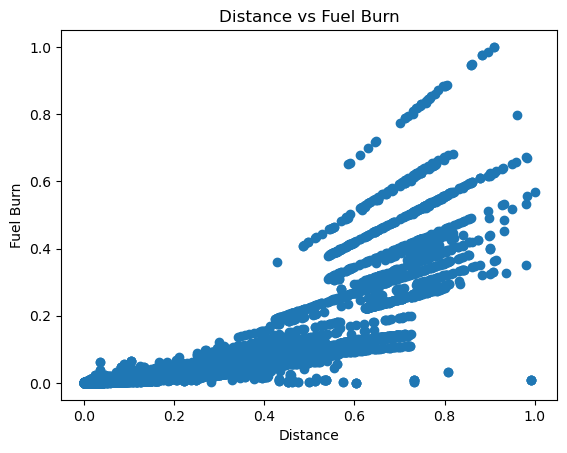

In [8]:
plt.scatter(df['distance'], df['fuel_burn'])
plt.xlabel('Distance')
plt.ylabel('Fuel Burn')
plt.title('Distance vs Fuel Burn')
plt.show()

<Axes: title={'center': 'Distance vs CO2 Emissions'}, xlabel='distance', ylabel='CO2'>

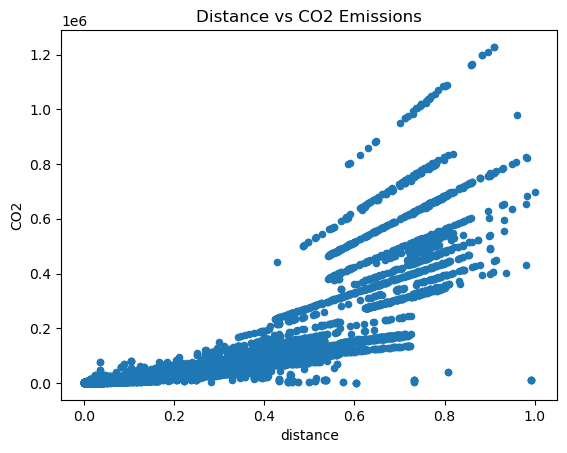

In [9]:
df.plot.scatter(x='distance', y='CO2', title='Distance vs CO2 Emissions')

In [10]:
print(df[['mean_taxi_in', 'mean_taxi_out']].mean())

mean_taxi_in      5.756504
mean_taxi_out    12.147458
dtype: float64


In [11]:
avg_fuel_burn_by_manufacturer = df.groupby('_Manufacturer')['fuel_burn'].mean().sort_values()

print(avg_fuel_burn_by_manufacturer)

_Manufacturer
Fairchild            0.000505
Beech                0.000685
LET                  0.001137
Saab                 0.001213
ATR                  0.001579
Dornier              0.001737
De Havilland         0.002424
BAe                  0.003352
De Havilland         0.003408
Bombardier           0.004381
Fokker               0.005350
Embraer              0.005672
Avro                 0.006358
Mcdonnell-Douglas    0.006977
Antonov              0.008089
OTHERS               0.009824
Yakovlev/Jakovlev    0.017170
Tupolev              0.019520
Airbus               0.021514
Boeing               0.033751
Ilyushin             0.153038
Name: fuel_burn, dtype: float64


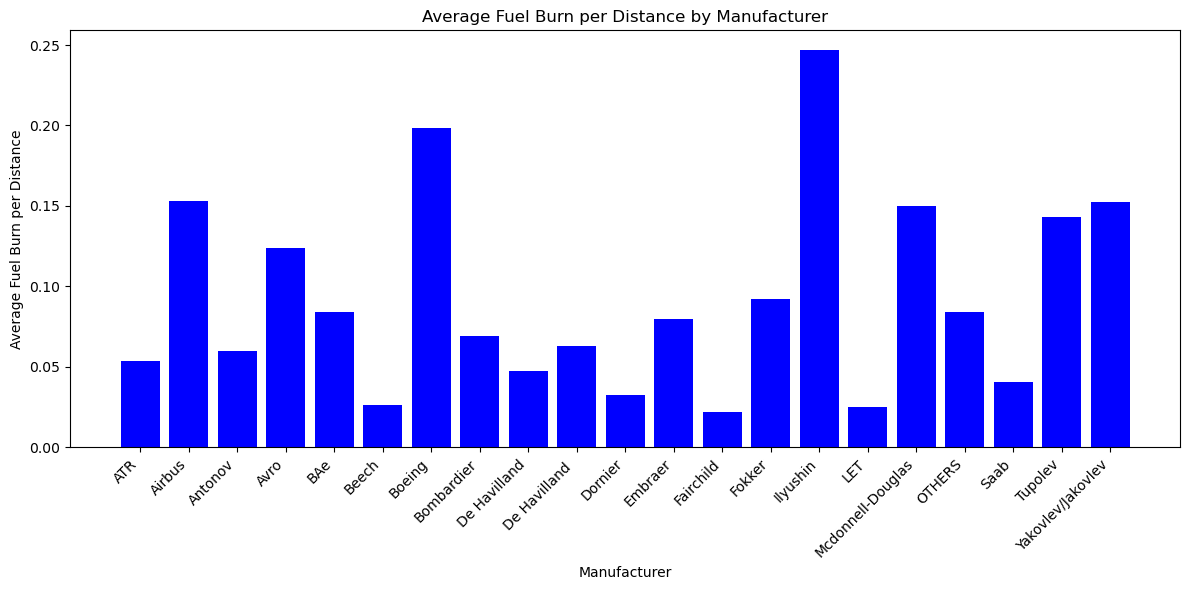

In [12]:
avg_fuel_burn_per_distance = df.groupby('_Manufacturer')['fuel_burn'].mean() / df.groupby('_Manufacturer')['distance'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_fuel_burn_per_distance.index, avg_fuel_burn_per_distance.values, color='blue')
plt.xlabel('Manufacturer')
plt.ylabel('Average Fuel Burn per Distance')
plt.title('Average Fuel Burn per Distance by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
X = sampled_df[['distance']].values
y = sampled_df['fuel_burn'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.0007040066350654435
R Squared: 0.5487702962604917


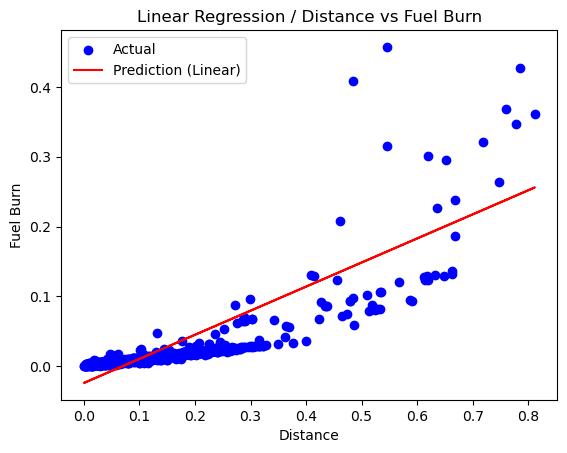

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction (Linear)')
plt.xlabel('Distance')
plt.ylabel('Fuel Burn')
plt.title('Linear Regression / Distance vs Fuel Burn')
plt.legend()
plt.show()

Multiple Linear Regression MSE: 0.0012274544971014822
Multiple Linear Regression R-squared: 0.6137041088951355


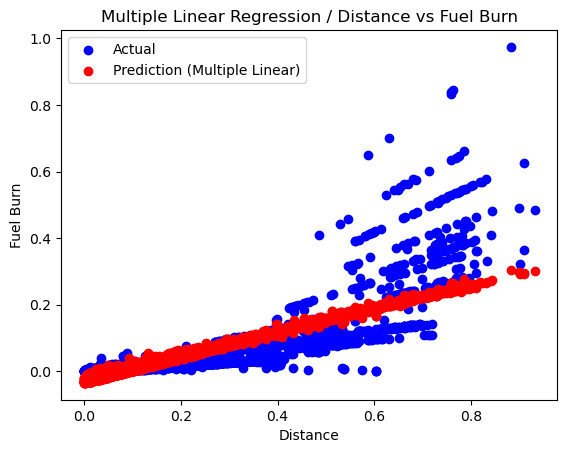

In [18]:
X = df[['distance', 'seats']].values
y = df['fuel_burn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)

y_pred = multi_linear_model.predict(X_test)

print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Multiple Linear Regression R-squared:", r2_score(y_test, y_pred))

plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Prediction (Multiple Linear)')
plt.xlabel('Distance')
plt.ylabel('Fuel Burn')
plt.title('Multiple Linear Regression / Distance vs Fuel Burn')
plt.legend()
plt.show()

Polynomial Regression MSE: 0.0005269143843373373
Polynomial Regression R-squared: 0.834173191662734


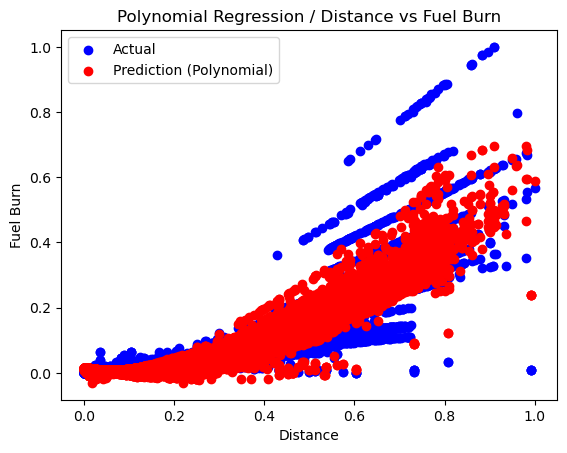

In [19]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)

print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred))
print("Polynomial Regression R-squared:", r2_score(y_test, y_pred))

plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X[:, 0], poly_model.predict(poly.transform(X)), color='red', label='Prediction (Polynomial)')
plt.xlabel('Distance')
plt.ylabel('Fuel Burn')
plt.title('Polynomial Regression / Distance vs Fuel Burn')
plt.legend()
plt.show()

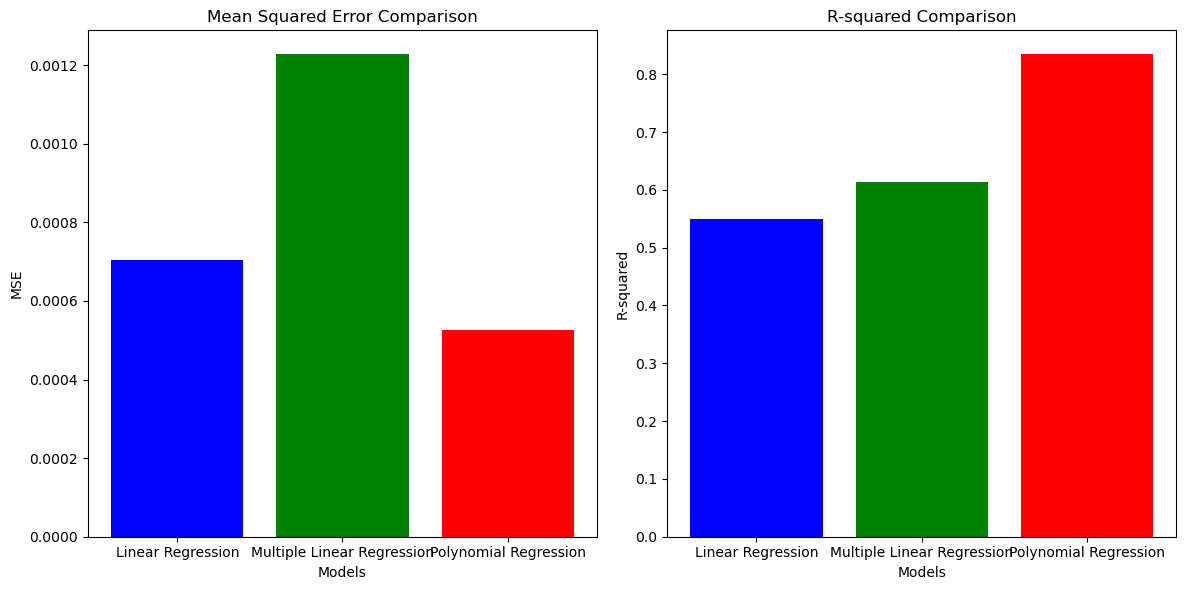

The best model is Polynomial Regression


In [20]:
models = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression']
mse_values = [0.0007040066350654435, 0.0012274544971014822, 0.0005269143843373373]
r2_values = [0.5487702962604917, 0.6137041088951355, 0.834173191662734]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error Comparison')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')

plt.tight_layout()
plt.show()

best_model_index = r2_values.index(max(r2_values))
best_model = models[best_model_index]

print("The best model is Polynomial Regression")
